In [1]:
get_ipython().magic(u'matplotlib inline')

In [2]:
import pandas as pd
import numpy as np

from scipy import stats, integrate

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from IPython.core import display as ICD

In [3]:
def read_loan(path, filename):
    df = pd.read_csv(path + "\\" + filename, sep='\t', header=0)
    df.columns = col_names
    '''
    Args: 
        path: Location of the import file
        filename: Name of the import file
    Returns:
        df: Imported loan level details data frame
    '''
    return df

def agg_column(df, col_name):
    '''
    Args: 
        df: Data frame the aggregation calculation is based on 
        col_name: Name of aggregated column
    Returns:
        agg_series: The return is a data series. All calcuated values <=1
    '''
    agg_series = df.groupby(col_name).loan_id.nunique() / df.loan_id.nunique()
    return agg_series

def percent_format(float_series, rename_col_index):
    '''
    Args: 
        float_series: Data series with float value
        rename_col_index: The index of column which needs 
                          to be renamed for clarification
    Returns:
        percent_df: The return is a data frame with float formated as %
    '''
    percent = float_series.mul(100).round(1).astype(str) + '%'
    percent_df = pd.DataFrame(percent).reset_index()
    percent_df.rename(columns={percent_df.columns[rename_col_index]: "percent" }, inplace=True)
    #percent_df.rename(columns = {'loan_id':'percent'}, inplace=True)  # Alt: rename a column by name
    return percent_df

In [4]:
# Create histogram method
def histogram(df, title_name):
    '''
    Args: 
        df: Data frame or data series for plotting histogram on feature value distribution 
        title_name: Name of histogram
    Returns:
        Histogram plot using matplotlib
    '''
    return df.plot(kind='bar', title=title_name).set(xlabel='\n' + title_name, ylabel='% to Total')

# Alternative way to create histogram method using feature as parameter
def histogram_alt(feature):
    df = distr_dict[feature]
    title_name = feature.split('_', 1)[0].upper()
    return df.plot(kind='bar', title=title_name).set(xlabel=title_name, ylabel='% to Total')

In [5]:
# rename columns if needed
col_names = ['loan_id','ory','orig_upb','loan_purp','prop_type',
             'multi_unit','orig_chn','occ_stat','dti_new',
             'FICO_new', 'ltv_new', 'fhb_flag', 'no_bor', 
             'prop_type_eligible', 'MI_chl', 'dr_time_default',
             'Ever_Delinquent', 'current_status', 'claim_flag']

features = ['ory', 'loan_purp', 'prop_type', 'multi_unit', 'orig_chn', 
            'occ_stat', 'dti_new', 'FICO_new', 'ltv_new', 'fhb_flag',
            'no_bor', 'prop_type_eligible', 'MI_chl', 'Ever_Delinquent',
            'claim_flag']

filepath = "C:\\Users\\SunLix\\Data\\Project\\Default Classification"
filename = "Loan_Orig_2010_2013.txt"

In [6]:
df = read_loan(filepath, filename)

In [7]:
df.head()

,loan_id,ory,orig_upb,loan_purp,prop_type,multi_unit,orig_chn,occ_stat,dti_new,FICO_new,ltv_new,fhb_flag,no_bor,prop_type_eligible,MI_chl,dr_time_default,Ever_Delinquent,current_status,claim_flag
0,8092146,2010,142200,P,SF,0,R,O,22.5,800,90,Y,2,1,Non-Delegated,NaN,0,17.Cancel,0
1,8092147,2010,160550,P,SF,0,R,O,32.5,730,95,Y,1,1,Non-Delegated,NaN,0,17.Cancel,0
2,8092148,2010,224639,P,SF,0,R,O,27.5,800,97,Y,2,1,Non-Delegated,NaN,0,01.Current,0
3,8092150,2010,340425,P,SF,0,R,O,22.5,730,90,Y,2,1,Non-Delegated,NaN,0,17.Cancel,0
4,8092152,2010,270750,P,SF,0,R,O,32.5,730,95,Y,2,1,Non-Delegated,NaN,0,17.Cancel,0


In [8]:
# Get size of data
df.shape

(481218, 19)

In [9]:
# unique number of loans
df.loan_id.nunique()

481218

In [10]:
# Get the list of columns along with dtypes
df.dtypes

loan_id                 int64
ory                     int64
orig_upb                int64
loan_purp              object
prop_type              object
multi_unit              int64
orig_chn               object
occ_stat               object
dti_new               float64
FICO_new                int64
ltv_new                 int64
fhb_flag               object
no_bor                  int64
prop_type_eligible      int64
MI_chl                 object
dr_time_default       float64
Ever_Delinquent         int64
current_status         object
claim_flag              int64
dtype: object

# Exploratory Data Analysis 

In [11]:
#check any column with NAN value
df.isnull().any()

loan_id               False
ory                   False
orig_upb              False
loan_purp             False
prop_type             False
multi_unit            False
orig_chn              False
occ_stat              False
dti_new               False
FICO_new              False
ltv_new               False
fhb_flag              False
no_bor                False
prop_type_eligible    False
MI_chl                False
dr_time_default        True
Ever_Delinquent       False
current_status        False
claim_flag            False
dtype: bool

### Features
- **Loan Origination Year**
- **Loan Purpose**: Purchase(P), Refinance with Cash-Out(C), Refinance Pay-off Existing Lien(N)
- **Property Type**: Single-Family and PUD(SF), Condo and Co-Op(CO), Manufactured Housing(MH)
- **Number of Units** 
- **Origination Channel:** Retail(R), Broker(B), Correspondent(C)
- **Occupancy Status:** Prim Resident or Unknown(O), Second(S), Investor(I)
- **DTI**: Debt to Income Ratio
- **FICO**: Borrower combined FICO score
- **LTV**: Loan to property Value Ratio
- **First Time Home Buyer Flag**
- **Number of Borrowers**
- **Property Type Eligible for MI**
- **MI Channel**
- **Every Deliquenty Flag**
- **Claim Flag**

In [12]:
for feature in features:
    ICD.display(percent_format(agg_column(df, feature), 1))

,ory,percent
0,2010,10.6%
1,2011,15.0%
2,2012,34.5%
3,2013,40.0%


,loan_purp,percent
0,C,2.6%
1,N,32.4%
2,P,65.1%


,prop_type,percent
0,CO,9.8%
1,MH,0.3%
2,SF,89.9%


,multi_unit,percent
0,0,99.9%
1,1,0.1%


,orig_chn,percent
0,R,100.0%


,occ_stat,percent
0,I,0.0%
1,O,96.5%
2,S,3.5%


,dti_new,percent
0,5.0,0.2%
1,12.5,1.2%
2,17.5,4.6%
3,22.5,10.2%
4,27.5,15.5%
5,32.5,18.9%
6,37.5,21.4%
7,42.5,25.3%
8,47.5,2.5%
9,50.0,0.2%


,FICO_new,percent
0,630,0.5%
1,650,1.2%
2,670,2.2%
3,690,6.1%
4,710,8.3%
5,730,13.0%
6,750,17.2%
7,770,20.6%
8,790,20.9%
9,800,9.9%


,ltv_new,percent
0,85,15.6%
1,90,38.7%
2,95,43.5%
3,97,2.3%


,fhb_flag,percent
0,N,68.3%
1,Y,31.7%


,no_bor,percent
0,1,50.8%
1,2,49.2%


,prop_type_eligible,percent
0,0,0.3%
1,1,99.7%


,MI_chl,percent
0,Delegated,66.7%
1,Non-Delegated,33.3%


,Ever_Delinquent,percent
0,0,97.5%
1,1,2.5%


,claim_flag,percent
0,0,99.8%
1,1,0.2%


In [13]:
# Claim Rate by Vintage Year
(df[df['claim_flag']==1]
 .groupby('ory')
 .loan_id.nunique()/df.groupby('ory').loan_id.nunique()
).mul(100).round(1).astype(str) + '%'

ory
2010    0.6%
2011    0.3%
2012    0.1%
2013    0.1%
Name: loan_id, dtype: object

### Distribution on Features Values

In [14]:
# Create dictionary to map feature's distribution
distr_dict = {}
for feature in features:
    distr_series = agg_column(df, feature)
    distr_dict[feature] = distr_series

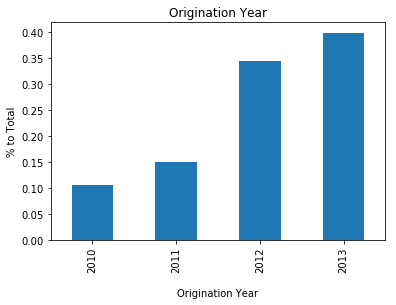

In [15]:
histogram(distr_dict['ory'], 'Origination Year')

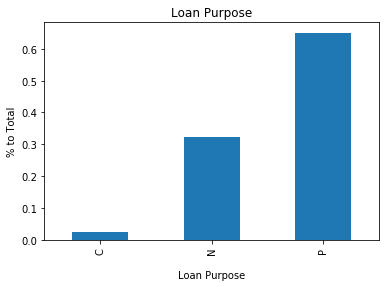

In [16]:
histogram(distr_dict['loan_purp'], 'Loan Purpose')

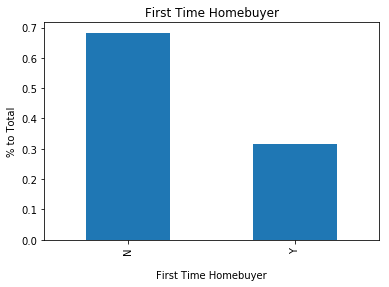

In [17]:
histogram(distr_dict['fhb_flag'], 'First Time Homebuyer')

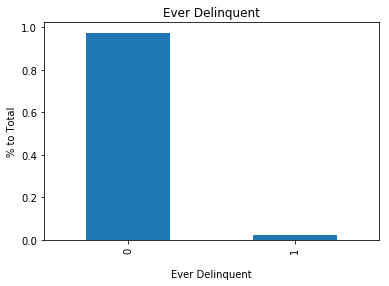

In [18]:
histogram(distr_dict['Ever_Delinquent'], 'Ever Delinquent')

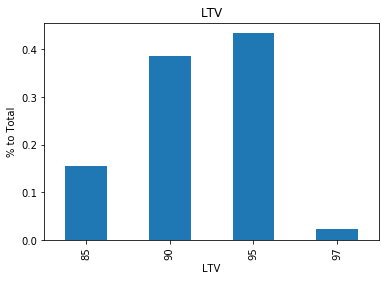

In [19]:
histogram_alt('ltv_new')

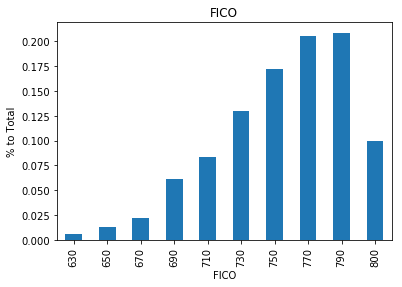

In [20]:
histogram_alt('FICO_new')

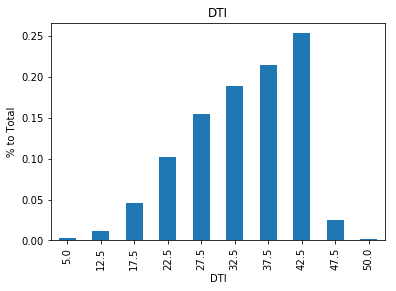

In [21]:
histogram_alt('dti_new')

# Modeling
**Due to unbalanced target data, we will need to upsample or downsample one of the class. Here I chose to downsample never deliquenty loans** 
 - Select 10,000 per group (Ever Delinquent)

In [22]:
target_col_name = 'Ever_Delinquent'
sample_size = 10000
df_new =df.groupby(target_col_name,as_index=False).apply(lambda x: x.sample(sample_size)).reset_index()

In [23]:
df_new.groupby(target_col_name).loan_id.nunique()

Ever_Delinquent
0    10000
1    10000
Name: loan_id, dtype: int64

### Selected Features
- **Loan Purpose**: loan_purp 
- **Property Type**: prop_type
- **Occupancy Status**: occ_stat
- **DTI**: dti_new
- **FICO**: FICO_new
- **LTV**: ltv_new
- **First Time Home Buyer Indicator**: fhb_flag
- **MI Channel**: MI_chl
- **Number of Borrower**: no_bor
- **Origination Year**: ory

### Target : Ever Delinquent (Y/N)

In [24]:
# Create a new DataFrame to just include selected features and target
selected_col_name = ['loan_purp', 'prop_type', 'occ_stat', 'dti_new',
                     'FICO_new', 'ltv_new', 'fhb_flag', 'MI_chl',
                     'no_bor','ory','Ever_Delinquent']
df_model = df_new[selected_col_name]

In [25]:
df_model.head()

,loan_purp,prop_type,occ_stat,dti_new,FICO_new,ltv_new,fhb_flag,MI_chl,no_bor,ory,Ever_Delinquent
0,P,SF,O,22.5,730,95,Y,Non-Delegated,1,2013,0
1,P,SF,O,27.5,770,95,Y,Non-Delegated,2,2012,0
2,P,SF,O,32.5,730,97,Y,Delegated,1,2012,0
3,N,SF,O,27.5,790,95,N,Non-Delegated,2,2011,0
4,P,SF,O,27.5,750,95,N,Delegated,1,2013,0


Split table into "target" vs. "features"

In [26]:
X = df_model.iloc[:,0:-1].values
y = df_model.iloc[:,-1].values

**Encode Categorical Columns**
- Use LabelEncoder to transform categorical columns to numeric value, and then use OneHotEncoder to get dummy variable
- Create dummy variables for fields which have more than 2 values

In [27]:
feature_ls = ['loan_purp', 'prop_type', 'occ_stat', 'dti_new', 'FICO_new', 
              'ltv_new', 'fhb_flag', 'MI_chl', 'no_bor','ory']
              
df_X = pd.DataFrame(X, columns=feature_ls)

# Create dummy variable and drop one value for each feature
df_X_dummy = pd.get_dummies(df_X, drop_first=True).astype(np.int64)

In [28]:
df_X_dummy.shape

(20000, 32)

In [29]:
df_X_dummy.head()

,loan_purp_N,loan_purp_P,prop_type_MH,prop_type_SF,occ_stat_S,dti_new_12.5,dti_new_17.5,dti_new_22.5,dti_new_27.5,dti_new_32.5,...,FICO_new_800,ltv_new_90,ltv_new_95,ltv_new_97,fhb_flag_Y,MI_chl_Non-Delegated,no_bor_2,ory_2011,ory_2012,ory_2013
0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,1
1,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,1,1,1,0,1,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
3,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,1,1,0,0
4,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [30]:
# FICO related fields list - used to create model threshold
df_X_FICO = df_X_dummy[['FICO_new_650', 'FICO_new_670', 'FICO_new_690',
                        'FICO_new_710', 'FICO_new_730', 'FICO_new_750',
                        'FICO_new_770', 'FICO_new_790', 'FICO_new_800'
                       ]]

# Change the transformed dataframe to array
X = df_X_dummy.as_matrix()
X_FICO = df_X_FICO.as_matrix()

In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_FICO_train, X_FICO_test, y_FICO_train, y_FICO_test = train_test_split(X_FICO, y, test_size = 0.2, random_state = 0)

**Creating Threshold Based on FICO Only Prediction**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
clf_thresh = LogisticRegression()
clf_thresh.fit(X_FICO_train, y_FICO_train)
y_FICO_pred = clf_thresh.predict(X_FICO_test)
print('ROC AUC Score Threshold is %s' % (roc_auc_score(y_FICO_test, y_FICO_pred)))

ROC AUC Score Threshold is 0.639391504524


** Applying Different Classifiers on Training Dataset **

In [33]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


In [34]:
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)))
models.append(('CART', DecisionTreeClassifier(criterion='entropy')))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel="linear")))
models.append(('SVMKernel', SVC(kernel="poly")))
models.append(('RF', RandomForestClassifier(n_estimators=100, criterion='entropy')))

LR: 0.749678 (0.009934)
LDA: 0.749662 (0.009724)
KNN: 0.671789 (0.015496)
CART: 0.639993 (0.013244)
NB: 0.700758 (0.016168)
SVM: 0.736875 (0.007894)
SVMKernel: 0.720598 (0.010208)
RF: 0.680917 (0.011524)


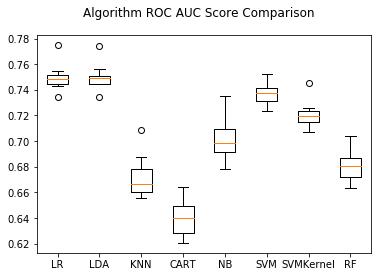

In [35]:
# prepare configuration for cross validation test harness
seed = 7

# Compare AUC score among different models
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm ROC AUC Score Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

** Find out the probablity of loan in claim with the ever deliquent status **

In [36]:
(df[df['claim_flag'] == 1]
  .groupby('Ever_Delinquent')
  .loan_id.nunique()/df.groupby('Ever_Delinquent').loan_id.nunique()
).mul(100).round(1).astype(str) + '%'

Ever_Delinquent
0    nan%
1    8.4%
Name: loan_id, dtype: object

** Perform Regularization and Hyperparameter Tuning On Logistic Regression Classifier **

In [37]:
# Create logistic regression
lr = LogisticRegression(random_state=0)

In [38]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 10-fold cross validation
clf = GridSearchCV(lr, hyperparameters, cv=10, verbose=0)

In [39]:
# Fit grid search
best_model = clf.fit(X_train, y_train)

In [40]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [41]:
penalty = best_model.best_estimator_.get_params()['penalty']
c = best_model.best_estimator_.get_params()['C']

# Model Evaluation

In [42]:
# Use the best byperparameter to finalize the model
clf_final = LogisticRegression(penalty=penalty, C=c, random_state=0)
clf_final.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf_final.predict(X_test)

In [43]:
clf_final.coef_

array([[-0.41624527, -0.49451489,  0.666192  ,  0.16361451,  0.53911607,
         0.14581856,  0.18507293,  0.2619449 ,  0.32114778,  0.56164789,
         0.70785002,  0.95630504,  1.1246208 ,  0.08330469,  0.19413026,
        -0.32896748, -0.77892022, -1.29722041, -1.59545917, -1.9511027 ,
        -2.31236022, -2.74467963, -2.82013885,  0.22006556,  0.49420124,
         0.74389875, -0.09149596,  0.03128137, -0.85742954, -0.55553288,
        -0.82686134, -0.9869907 ]])

In [44]:
df_X_dummy.columns.values

array(['loan_purp_N', 'loan_purp_P', 'prop_type_MH', 'prop_type_SF',
       'occ_stat_S', 'dti_new_12.5', 'dti_new_17.5', 'dti_new_22.5',
       'dti_new_27.5', 'dti_new_32.5', 'dti_new_37.5', 'dti_new_42.5',
       'dti_new_47.5', 'dti_new_50.0', 'FICO_new_650', 'FICO_new_670',
       'FICO_new_690', 'FICO_new_710', 'FICO_new_730', 'FICO_new_750',
       'FICO_new_770', 'FICO_new_790', 'FICO_new_800', 'ltv_new_90',
       'ltv_new_95', 'ltv_new_97', 'fhb_flag_Y', 'MI_chl_Non-Delegated',
       'no_bor_2', 'ory_2011', 'ory_2012', 'ory_2013'], dtype=object)

In [45]:
d = {"Feature":df_X_dummy.columns.values, "Coefficients":clf_final.coef_}
pd.DataFrame.from_dict(d)

Exception: Data must be 1-dimensional

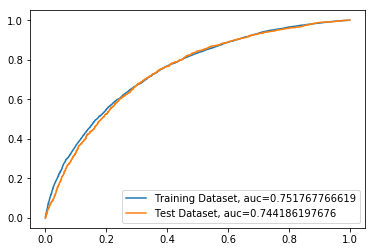

In [46]:
# Plot the ROC of the training set vs. the test set

from sklearn.metrics import roc_curve

# For Training Dataset, plot roc curve
fpr, tpr, thresholds = roc_curve(y_train, clf_final.predict_proba(X_train)[:,1])
auc = roc_auc_score(y_train, clf_final.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,label="Training Dataset, auc="+str(auc))

# For Test Dataset, plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, clf_final.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, clf_final.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label="Test Dataset, auc="+str(auc))


plt.legend(loc=0)

In [47]:
# Return the probablity of "1" class to training set and test set
y_hats_train = clf_final.predict(X_train)
class1_proba_train = clf_final.predict_proba(X_train)[:,1]
df_train = pd.DataFrame(X_train, columns = df_X_dummy.columns)
df_train.loc[:,'y_actual'] = y_train
df_train.loc[:,'y_hats'] = y_hats_train
df_train.loc[:,'class1_proba'] = class1_proba_train

y_hats_test = clf_final.predict(X_test)
class1_proba_test = clf_final.predict_proba(X_test)[:,1]
df_test = pd.DataFrame(X_test)
df_test.loc[:,'y_actual'] = y_test
df_test.loc[:,'y_hats'] = y_hats_test
df_test.loc[:,'class1_proba'] = class1_proba_test

In [48]:
df_test.class1_proba

0       0.507695
1       0.277310
2       0.265151
3       0.689123
4       0.340416
5       0.278984
6       0.731704
7       0.699052
8       0.888441
9       0.399928
10      0.173865
11      0.557679
12      0.707425
13      0.394158
14      0.526493
15      0.223275
16      0.660931
17      0.827801
18      0.457388
19      0.398278
20      0.776631
21      0.506986
22      0.187992
23      0.844856
24      0.852347
25      0.741125
26      0.413626
27      0.725910
28      0.298544
29      0.128863
          ...   
3970    0.823297
3971    0.838767
3972    0.683009
3973    0.485779
3974    0.784897
3975    0.843293
3976    0.198438
3977    0.486301
3978    0.319802
3979    0.663127
3980    0.096694
3981    0.683086
3982    0.466270
3983    0.505267
3984    0.394031
3985    0.337452
3986    0.766151
3987    0.241995
3988    0.121457
3989    0.435708
3990    0.658624
3991    0.408645
3992    0.294724
3993    0.484072
3994    0.313477
3995    0.707425
3996    0.526305
3997    0.7888

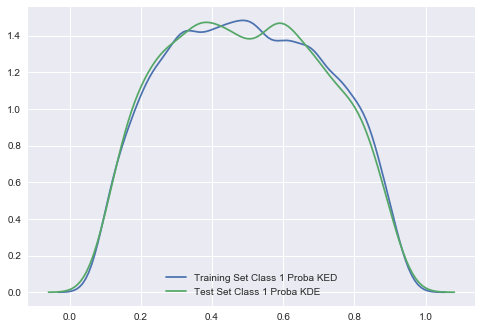

In [49]:
import seaborn as sns
sns.kdeplot(df_train.class1_proba, label="Training Set Class 1 Proba KED")
sns.kdeplot(df_test.class1_proba, label="Test Set Class 1 Proba KDE") 